The package used below will have to be explicitly imported

Package name: TSForecasting

All the packages mentioned below will be installed automatically installed in case they are missing :
 - pandas
 - numpy
 - matplotlib
 - dateutil
 - re

The pandas package that is explicitly imported will be used to read the data supplied by you

In [1]:
from TSForecasting.TsForecasting import TimeSeriesForecast
import pandas as pd

Using TensorFlow backend.


=========================================================================================================

Now, we create an object of the TimeSeriesForecast class

This is object which has the model and methods to predict the imputed values

The object has a pretrained model on the data described below. The model is capable of performing imputations

In [2]:
obj = TimeSeriesForecast()

Epoch 1/1
29188/29188 [==============================] - 58s 2ms/step - loss: 2.8321e-04


***
***
To read the documentation of any method:
1. Place the cursor inside the parenthesis of the function, hold down shift and press tab
2. Run the following code (substitute 'impute' with the name of the method)

In [3]:
obj.impute?

***
***
The following method describes the __CGM data__ used to pre-train the model
***

Here is a glimpse of the data:

         Display Time subjectId  GlucoseValue
0 2016-06-25 09:14:00      ID01       108.000
1 2016-06-25 09:17:00      ID01       108.000
2 2016-06-25 09:20:00      ID01       108.000
3 2016-06-25 09:23:00      ID01       107.658
4 2016-06-25 09:26:00      ID01       107.496






,Length of readings,Max. Glucose Value,Min. Glucose Value,Days
count,12.000000,12.000000,12.000000,12
mean,2432.416667,256.847500,65.063333,5 days 01:34:15
std,605.555711,97.372823,24.159458,1 days 06:16:40.028065
min,1443.000000,170.390000,14.020000,3 days 00:06:00
25%,2015.250000,185.947500,58.397500,4 days 04:42:45
50%,2491.000000,230.130000,65.500000,5 days 04:30:00
75%,2989.000000,297.727500,79.762500,6 days 05:24:00
max,3260.000000,508.710000,95.400000,6 days 18:57:00


Here is the statistical analysis of the data:



,Subject ID,Status,Length of readings,Max. Glucose Value,Min. Glucose Value,Days,Start,End
0,ID31,HEALTHY,1443,182.19,66.47,3 days 00:06:00,2016-06-06 16:55:00,2016-06-09 17:01:00
1,ID30,HEALTHY,2472,187.20,59.40,5 days 03:33:00,2016-12-21 07:29:00,2016-12-26 11:02:00
2,ID29,HEALTHY,1728,195.64,75.15,3 days 14:21:00,2016-12-19 22:42:00,2016-12-23 13:03:00
3,ID23,PRE-DIABETIC,3260,326.83,64.53,6 days 18:57:00,2016-10-11 15:34:00,2016-10-18 10:31:00
4,ID22,PRE-DIABETIC,2111,170.39,34.20,4 days 09:30:00,2016-12-29 07:35:00,2017-01-02 17:05:00
5,ID21,PRE-DIABETIC,2686,214.20,66.60,5 days 14:15:00,2016-11-22 07:26:00,2016-11-27 21:41:00
6,ID13,DIABETIC-2,1681,246.06,94.75,3 days 12:00:00,2016-12-01 07:44:00,2016-12-04 19:44:00
7,ID12,DIABETIC-2,2980,271.80,93.60,6 days 04:57:00,2016-08-02 08:19:00,2016-08-08 13:16:00
8,ID11,DIABETIC-2,2205,316.80,95.40,4 days 14:12:00,2017-01-07 08:52:00,2017-01-11 23:04:00
9,ID03,DIABETIC-1,3097,508.71,61.25,6 days 10:48:00,2016-05-26 06:09:00,2016-06-01 16:57:00


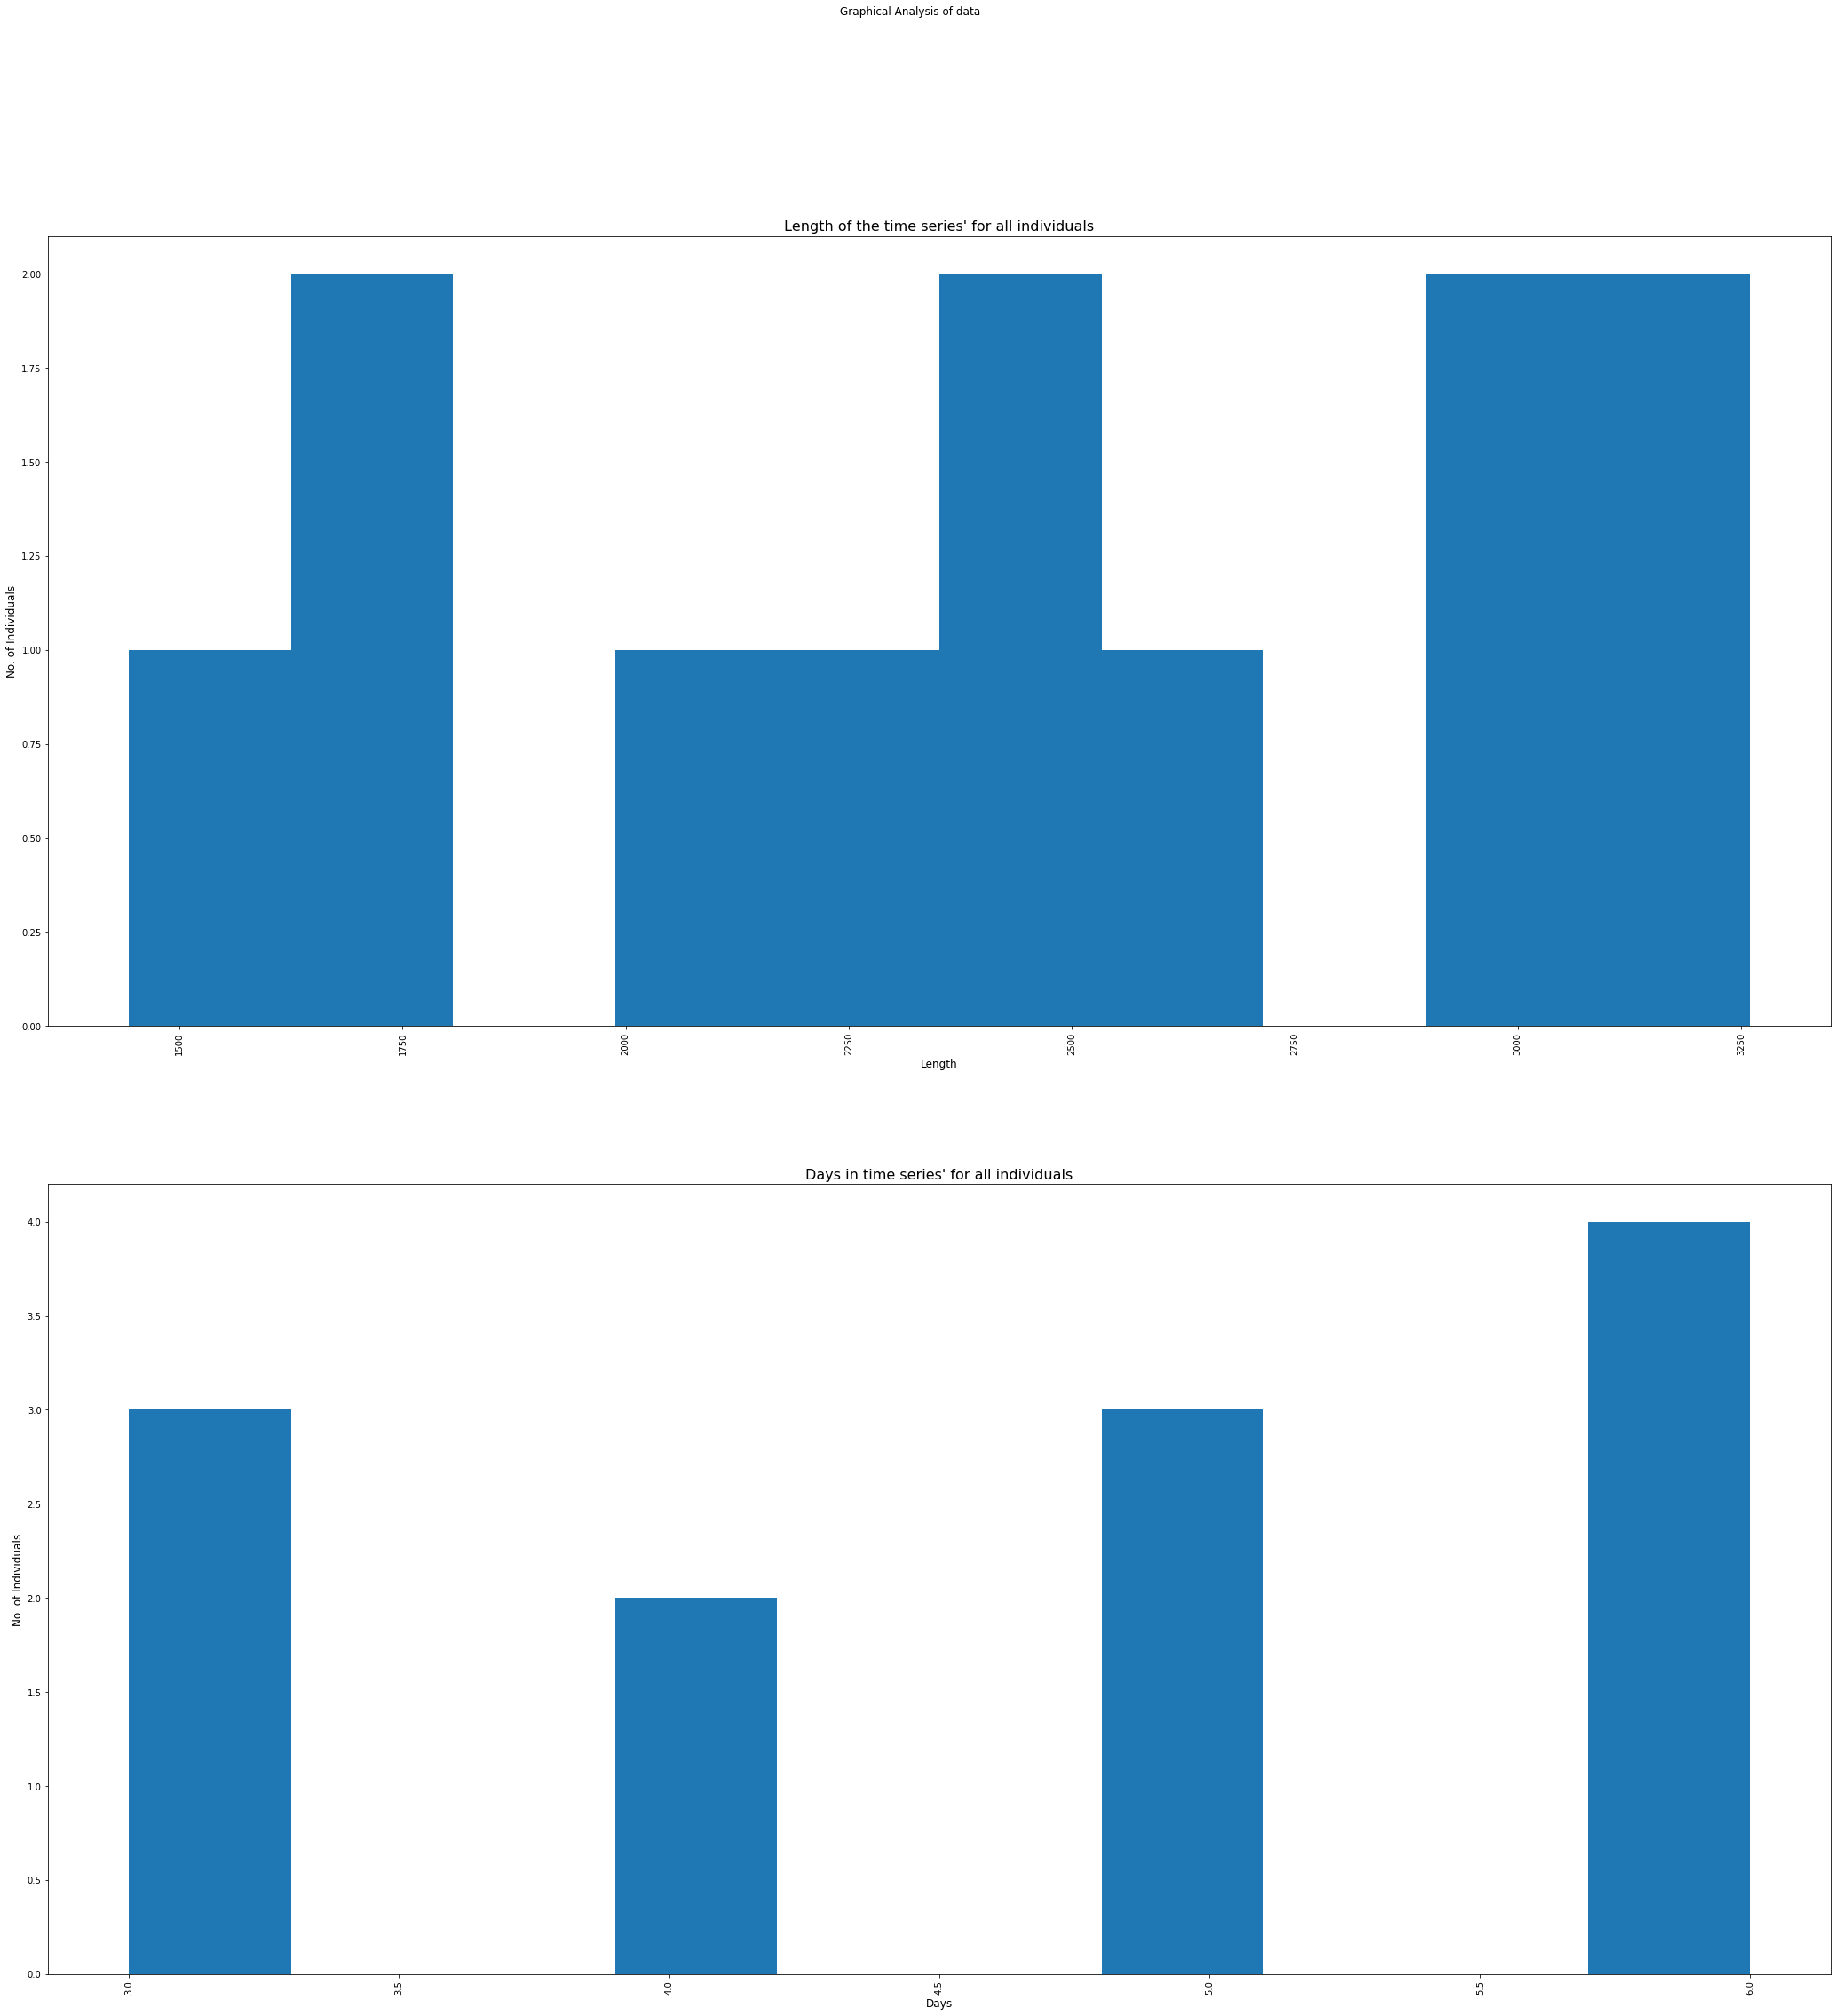

In [4]:
obj.dataDescribe()

***
***
To see what a specific individual's glucose values look like, run the following line. 

In between the quotes, pass the Subject ID of that individual

The different subject ID's can be found in the description table above
***

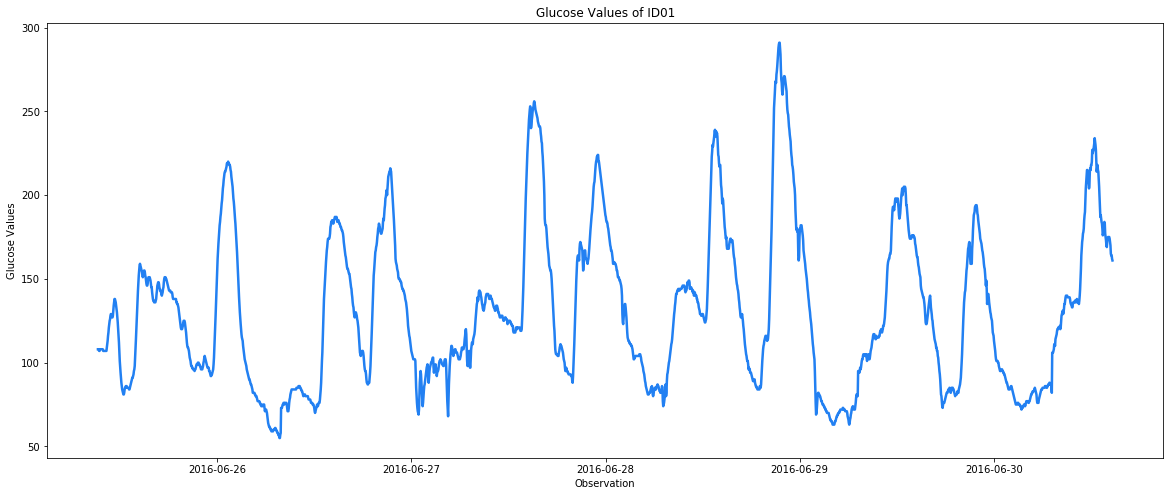

In [5]:
obj.plotSpecific('ID01')

***
***
To test the pretrained model, write the path of the testing dataset below:
***

In [6]:
testing_data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/test/generated_test.txt", sep=",")

***
***
Now, we run the imputation model on the data you supplied above

The graph you see is the imputed glucose values
***

Gap detected!
566/566 [==============================] - 0s 881us/step
Imputations performed!
File saved!


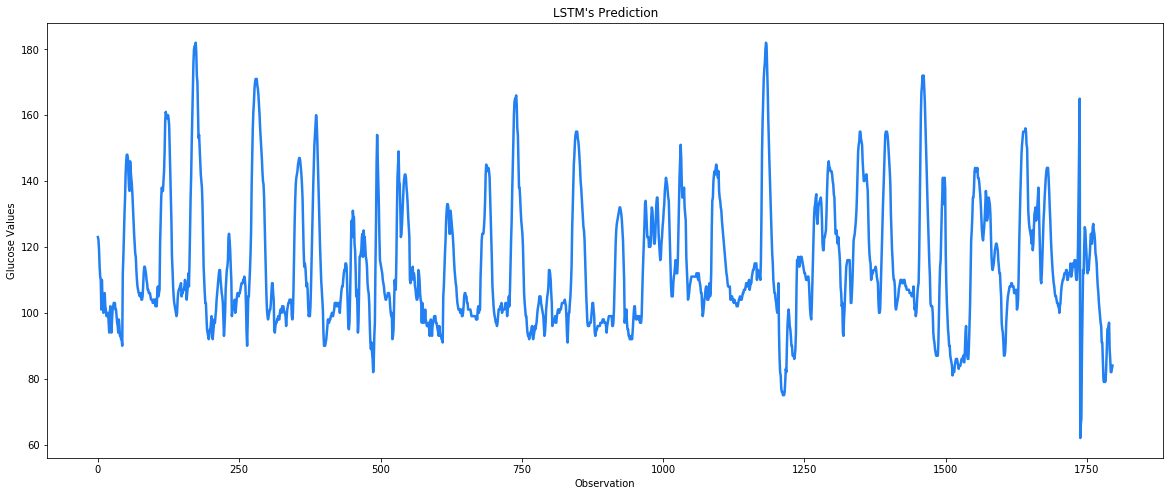

In [7]:
obj.impute(testing_data)

===============================================================================================================

In case you wish to train your own model, use the following code

Write the path to your file for the training and test set



Be careful of the following:
1. Enter the path of your file
2. The file should have only two columns in the following order with the exact names: Timestamp, GlucoseValue
3. The date of the timestamp should have the entire year (all 4 digits). Make sure the data is numeric (irrespective of the delimiter)



In [8]:
training_data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/CGM/CGM_Analyzer_Appended.csv")

***
***
Use the following function to train the model on the data you just supplied
***

In [9]:
obj.train(training_data)

Train shape:  (30525, 1, 1)
Epoch 1/1
30525/30525 [==============================] - 61s 2ms/step - loss: 3.2452e-04


***
***
To test the model you just trained, write the path of the testing dataset below:
***

In [10]:
testing_data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/test/generated_test.txt", sep=",")

***
***
Now, we run the imputation model on the data you supplied above
***

Gap detected!
566/566 [==============================] - 0s 859us/step
Imputations performed!
File saved!


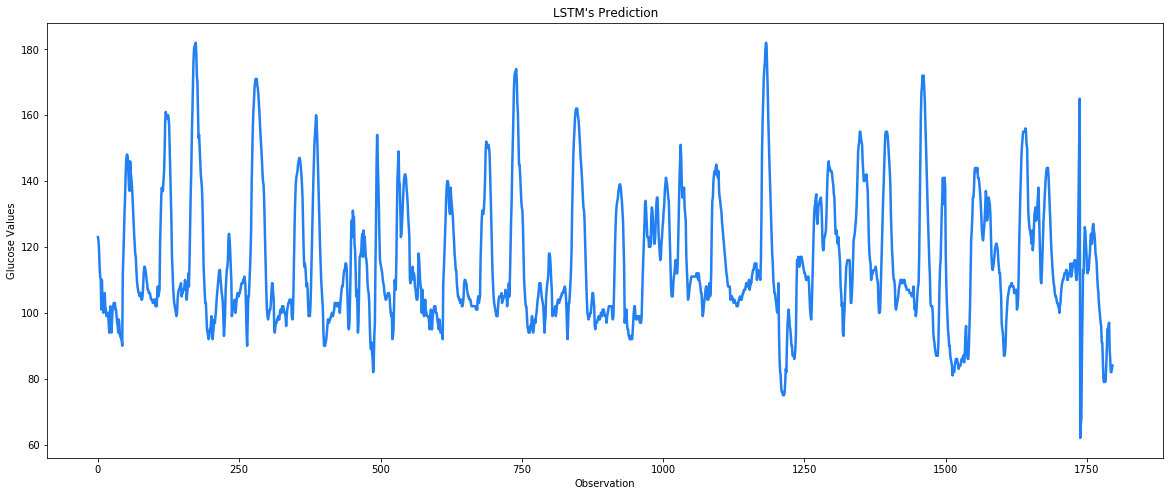

In [11]:
obj.impute(testing_data)

===============================================================================================================

***
***
Now, lets training the model on the HALL Dataset
***

In [12]:
training_data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/Hall/Hall_data.csv")

In [13]:
obj.train(training_data)

Train shape:  (103673, 1, 1)
Epoch 1/1
103673/103673 [==============================] - 213s 2ms/step - loss: 7.0788e-04


***
***
The following method describes the __raw HALL data__ before processing 

The data needs to be processed before we use it to train our imputation model
***



Here is a glimpse of the data:

         Display Time GlucoseValue    subjectId
0 2014-02-03 03:42:12           93  1636-69-001
1 2014-02-03 03:47:12           93  1636-69-001
2 2014-02-03 03:52:12           93  1636-69-001
3 2014-02-03 03:57:12           95  1636-69-001
4 2014-02-03 04:02:12           96  1636-69-001






,Length of readings,Gapsize,Missing Values,Percent of missing values,Days
count,57.000000,57,57.000000,57.000000,57
mean,1849.578947,21 days 22:01:48.929824,27.473684,1.427018,29 days 02:20:02.333333
std,104.808149,73 days 09:22:16.337099,32.057485,1.504522,74 days 06:47:55.221313
min,1584.000000,0 days 00:10:00,1.000000,0.060000,5 days 16:14:32
25%,1796.000000,0 days 01:15:00,8.000000,0.440000,6 days 07:39:25
50%,1822.000000,0 days 04:25:00,20.000000,1.140000,6 days 23:39:38
75%,1877.000000,0 days 19:09:56,31.000000,1.690000,8 days 07:49:13
max,2361.000000,416 days 17:21:34,176.000000,7.450000,423 days 11:25:54


Here is the statistical analysis of the data:



,Subject ID,Status,Length of readings,Max. Glucose Value,Min. Glucose Value,Gapsize,Missing Values,Percent of missing values,Days,Start,End
0,2133-041,non-diabetic,1858,99,100,0 days 20:59:57,17,0.91,8 days 02:09:26,2017-07-03 18:32:06,2017-07-11 20:41:32
1,2133-040,non-diabetic,1792,99,100,0 days 01:19:59,34,1.90,6 days 10:44:37,2017-06-28 13:34:52,2017-07-05 00:19:29
2,2133-039,diabetic,2013,99,100,0 days 11:44:58,130,6.46,9 days 01:34:20,2017-06-05 12:23:22,2017-06-14 13:57:42
3,2133-037,non-diabetic,1785,99,100,0 days 01:14:59,19,1.06,6 days 07:39:25,2017-06-05 14:11:14,2017-06-11 21:50:39
4,2133-036,pre-diabetic,1954,99,100,0 days 06:49:59,119,6.09,8 days 15:04:26,2017-06-01 15:26:53,2017-06-10 06:31:19
5,2133-035,pre-diabetic,1830,99,100,0 days 06:50:00,57,3.11,7 days 05:49:42,2017-06-01 17:17:00,2017-06-08 23:06:42
6,2133-033,non-diabetic,1892,99,100,0 days 07:29:59,26,1.37,7 days 07:04:31,2017-05-19 12:58:22,2017-05-26 20:02:53
7,2133-032,non-diabetic,1781,99,100,0 days 00:10:00,3,0.17,6 days 04:34:25,2017-05-19 13:31:19,2017-05-25 18:05:44
8,2133-030,non-diabetic,1818,99,100,0 days 09:24:59,7,0.39,6 days 18:44:36,2017-05-03 14:13:09,2017-05-10 08:57:45
9,2133-028,non-diabetic,1850,99,100,0 days 11:09:58,3,0.16,7 days 02:04:30,2017-05-10 00:03:32,2017-05-17 02:08:02


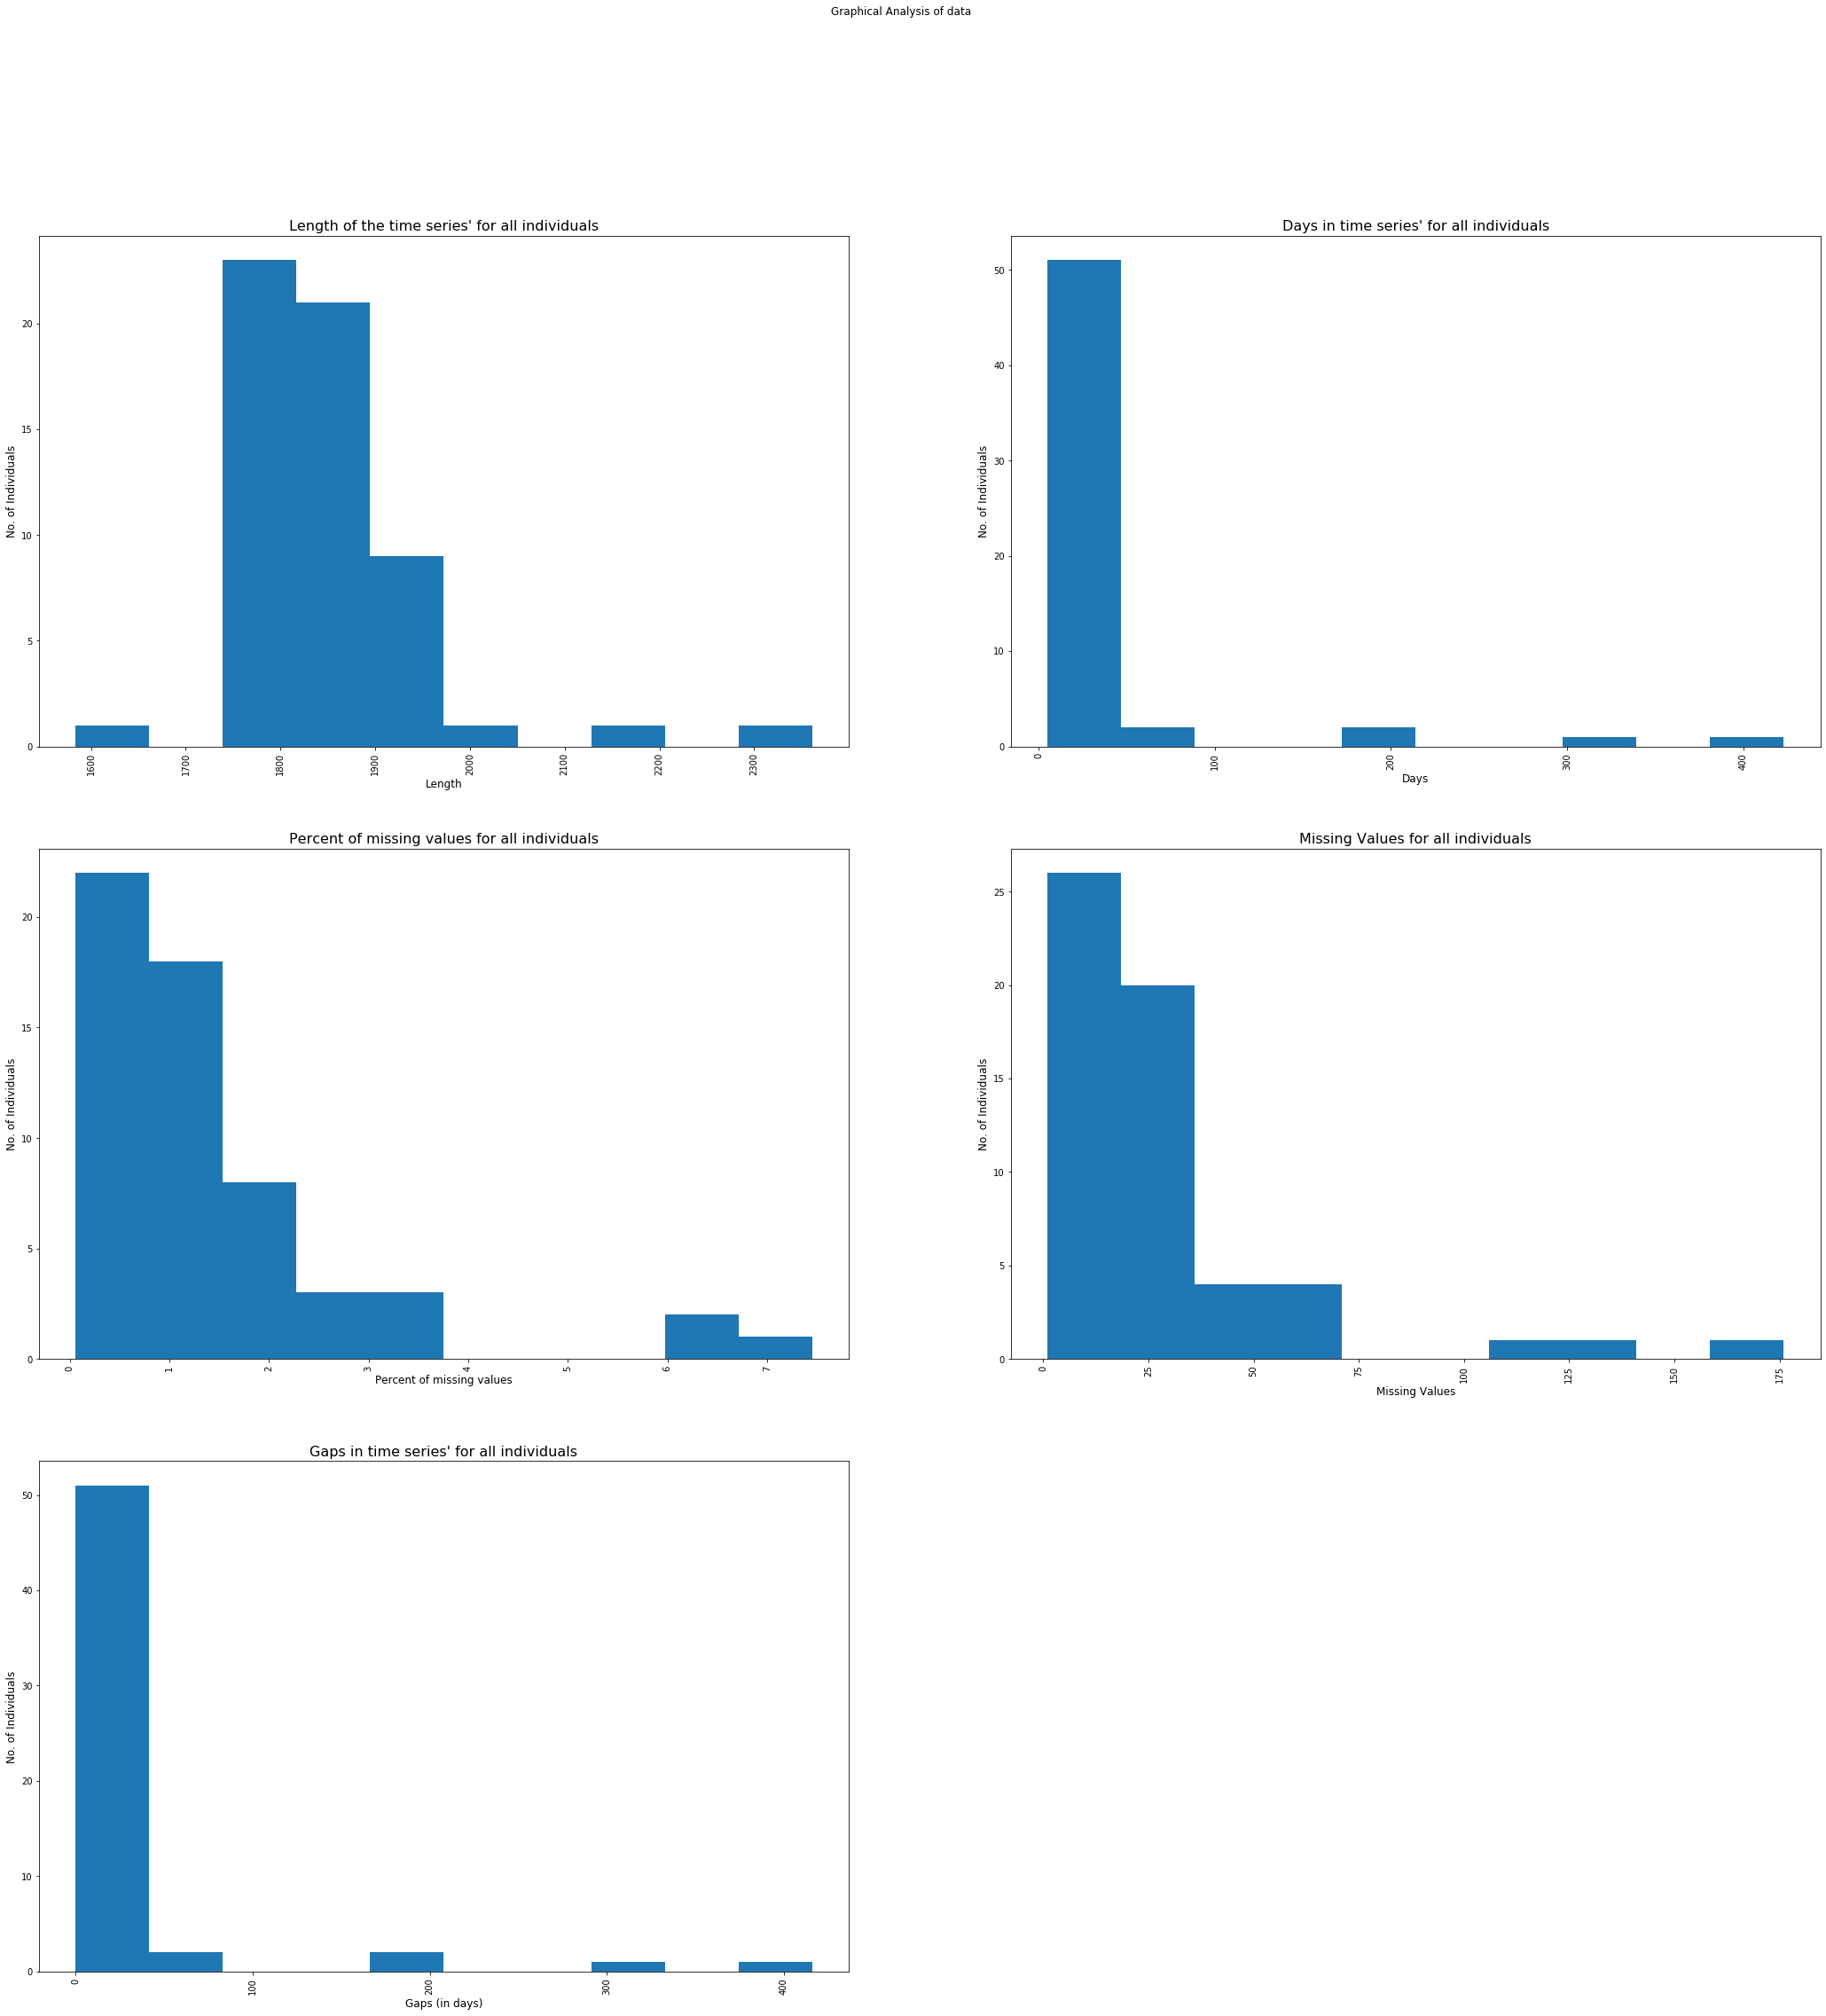

In [14]:
obj.rawData()

***
***
The following method describes the data after processing 

The imputation model has been trained on this processed data

We use the following processed (cleaned) data for training our model

This minimizes erronous data being fed to the model
***


Here is a glimpse of the data:

         Display Time  GlucoseValue    subjectId
0 2014-02-03 03:42:12            93  1636-69-001
1 2014-02-03 03:47:12            93  1636-69-001
2 2014-02-03 03:52:12            93  1636-69-001
3 2014-02-03 03:57:12            95  1636-69-001
4 2014-02-03 04:02:12            96  1636-69-001






,Length of readings,Gapsize,Missing Values,Percent of missing values,Days
count,60.000000,60,60.000000,60.000000,60
mean,1727.900000,0 days 05:49:09.116666,25.200000,1.490000,6 days 15:30:15.116666
std,288.173835,0 days 06:52:22.017395,26.647606,1.688264,1 days 08:38:16.086564
min,580.000000,0 days 00:10:00,1.000000,0.060000,2 days 01:54:50
25%,1776.750000,0 days 01:14:59.750000,7.000000,0.447500,6 days 04:38:22.250000
50%,1804.500000,0 days 02:49:59.500000,18.000000,1.110000,6 days 10:44:34
75%,1847.000000,0 days 07:31:13.750000,30.250000,1.690000,7 days 03:00:48
max,2180.000000,1 days 03:49:54,130.000000,7.740000,11 days 01:04:20


Here is the statistical analysis of the data:



,Subject ID,Status,Length of readings,Max. Glucose Value,Min. Glucose Value,Gapsize,Missing Values,Percent of missing values,Days,Start,End
0,2133-041,non-diabetic,1858,204,51,0 days 20:59:57,17,0.91,8 days 02:09:26,2017-07-03 18:32:06,2017-07-11 20:41:32
1,2133-040,non-diabetic,1792,171,59,0 days 01:19:59,34,1.90,6 days 10:44:37,2017-06-28 13:34:52,2017-07-05 00:19:29
2,2133-039,diabetic,2013,204,50,0 days 11:44:58,130,6.46,9 days 01:34:20,2017-06-05 12:23:22,2017-06-14 13:57:42
3,2133-037,non-diabetic,1785,153,48,0 days 01:14:59,19,1.06,6 days 07:39:25,2017-06-05 14:11:14,2017-06-11 21:50:39
4,2133-036,pre-diabetic,1954,214,58,0 days 06:49:59,119,6.09,8 days 15:04:26,2017-06-01 15:26:53,2017-06-10 06:31:19
5,2133-035,pre-diabetic,1830,190,47,0 days 06:50:00,57,3.11,7 days 05:49:42,2017-06-01 17:17:00,2017-06-08 23:06:42
6,2133-033,non-diabetic,1892,161,49,0 days 07:29:59,26,1.37,7 days 07:04:31,2017-05-19 12:58:22,2017-05-26 20:02:53
7,2133-032,non-diabetic,1781,147,69,0 days 00:10:00,3,0.17,6 days 04:34:25,2017-05-19 13:31:19,2017-05-25 18:05:44
8,2133-030,non-diabetic,1818,147,41,0 days 09:24:59,7,0.39,6 days 18:44:36,2017-05-03 14:13:09,2017-05-10 08:57:45
9,2133-028,non-diabetic,1850,111,45,0 days 11:09:58,3,0.16,7 days 02:04:30,2017-05-10 00:03:32,2017-05-17 02:08:02


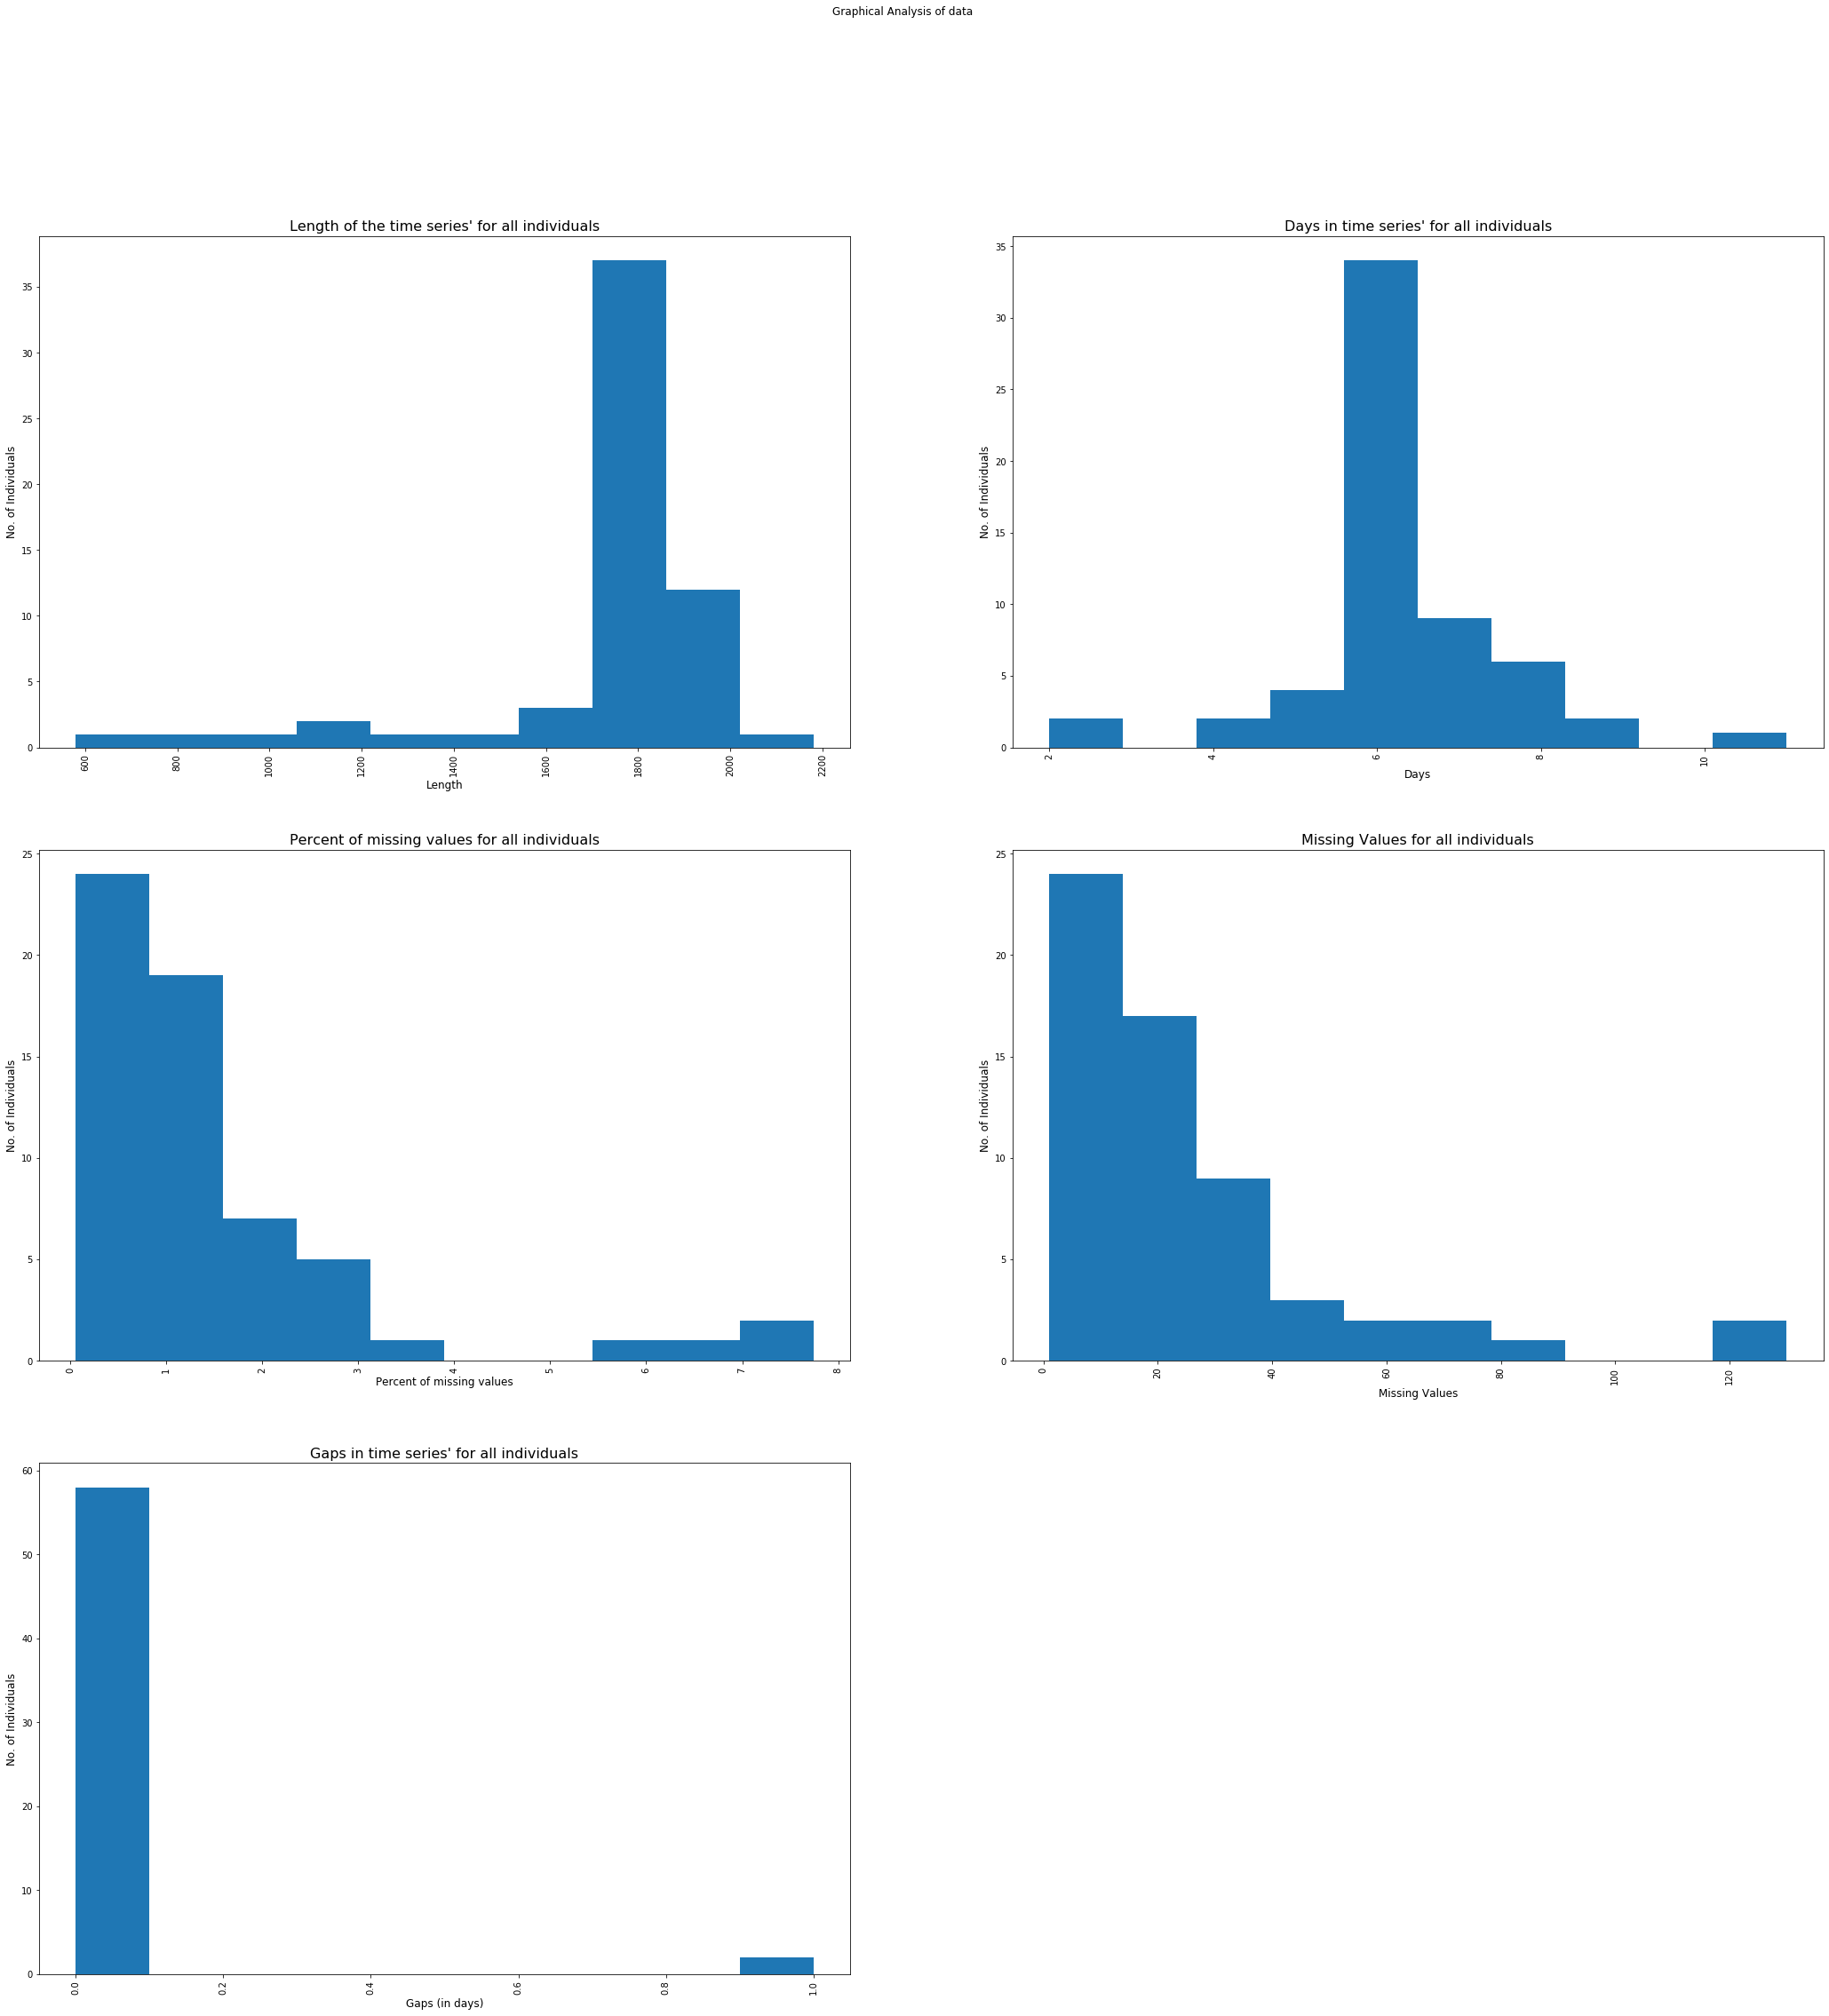

In [15]:
obj.processedData()

***
***
To test the model we trained on the HALL dataset, write the path of the testing dataset below:
***

In [16]:
testing_data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/TSForecasting/Data/test/generated_test.txt", sep=",")

***
***
Now, we run the imputation model on the data you supplied above
***

Gap detected!
566/566 [==============================] - 0s 870us/step
Imputations performed!
File saved!


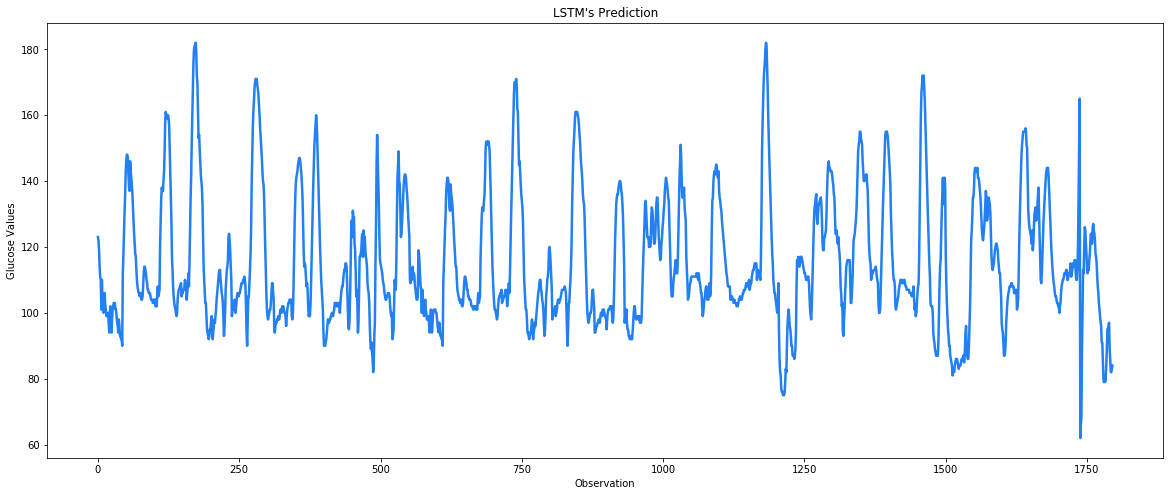

In [17]:
obj.impute(testing_data)